In [1]:
# Export data manipulation Libraries
import pandas as pd
import numpy as np
# import data visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# import data filter warning Libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data using url from github
url = 'https://raw.githubusercontent.com/deva457/SUPPLYCHAIN/refs/heads/main/SCM.csv'
df = pd.read_csv(url)
df.sample(frac = 1)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
2104,WH_102104,EID_52104,Rural,Mid,North,Zone 2,7,0,3,3981,...,1,88,33.0,2000.0,27,0,A,2,12,35100
14968,WH_114968,EID_64968,Rural,Mid,South,Zone 2,0,0,2,7180,...,1,97,24.0,NaN,33,0,A,5,12,43138
4345,WH_104345,EID_54345,Rural,Large,West,Zone 6,7,0,1,5673,...,1,202,29.0,1998.0,36,1,A+,6,23,51065
10946,WH_110946,EID_60946,Rural,Small,West,Zone 6,1,0,3,5891,...,1,236,25.0,NaN,20,1,B,3,9,26060
14143,WH_114143,EID_64143,Rural,Mid,West,Zone 4,5,1,4,6082,...,1,111,39.0,1998.0,26,0,C,2,11,34136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,WH_106873,EID_56873,Urban,Mid,West,Zone 4,4,0,3,3896,...,0,235,NaN,1998.0,32,1,A+,6,11,45144
16920,WH_116920,EID_66920,Urban,Mid,West,Zone 2,8,4,2,4551,...,0,111,28.0,NaN,5,0,B+,3,18,6131
40,WH_100040,EID_50040,Rural,Large,West,Zone 6,3,0,4,6729,...,1,80,32.0,2004.0,23,1,C,5,23,32117
13314,WH_113314,EID_63314,Rural,Small,North,Zone 6,3,0,3,5989,...,1,250,25.0,2003.0,24,0,A,6,13,31077


In [3]:
# checking information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:
 df["workers_num"].isnull().sum() / len(df['workers_num'])*100

np.float64(3.959367945823928)

In [5]:
df['workers_num'].median()

np.float64(28.0)

In [6]:
df['workers_num'].mean()

np.float64(28.93639825130447)

In [7]:
df['workers_num'].quantile(0.75),df['workers_num'].quantile(0.25)
#whenever we imputing mean or median or by any constant value then please ensure imputation must be integer value not a decimal 

(np.float64(33.0), np.float64(24.0))

In [8]:
df['workers_num'].fillna(28,inplace = True)

In [9]:
#how to check if any null values 
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [10]:
#separate categorical and numerical columns 
categorical_columns = df.select_dtypes(include = 'object')

In [11]:
numerical_columns = df.select_dtypes(exclude = 'object')

In [12]:
categorical_columns 

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [13]:
numerical_columns

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,29.0,NaN,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,31.0,NaN,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,37.0,NaN,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,21.0,NaN,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,8,1,3,5030,46,0,0,1,203,28.0,2007.0,22,1,2,4,29138
22146,3,1,3,4320,60,0,0,0,170,28.0,NaN,26,0,5,9,33108
22147,7,2,2,5268,64,0,0,0,99,22.0,NaN,20,0,6,4,24072
22148,6,2,4,4378,32,0,0,0,220,17.0,NaN,13,0,3,28,15055


In [14]:
df.drop(columns = ['Ware_house_ID','WH_Manager_ID'],axis = 1,inplace = True)

In [15]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [16]:
westzone = df[df['zone']=='West'].value_counts()

<Axes: ylabel='count'>

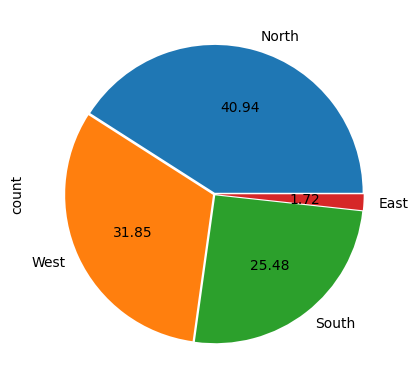

In [17]:
df['zone'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.01,0.01,0.01,0.01])

In [18]:
# Evaluate the data for West Zone 

westzone = df[df['zone'] == 'West']
westzone

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,...,1,77,27.0,2010.0,24,0,B,3,6,30142
14,Rural,Small,West,Zone 6,8,1,4,5022,Rented,68,...,1,129,37.0,NaN,6,0,B,3,9,7055
16,Rural,Mid,West,Zone 4,0,0,2,5569,Company Owned,16,...,1,231,28.0,NaN,9,0,B+,5,11,12127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22119,Rural,Large,West,Zone 6,8,0,4,4687,Rented,62,...,1,160,26.0,2005.0,32,0,B,3,23,40086
22138,Rural,Mid,West,Zone 4,7,0,3,4686,Company Owned,55,...,1,148,28.0,2010.0,23,0,B+,6,11,29130
22139,Rural,Mid,West,Zone 3,5,0,4,3771,Rented,66,...,0,97,30.0,1998.0,24,0,C,2,19,30102
22140,Rural,Large,West,Zone 5,7,0,4,4593,Rented,18,...,1,78,24.0,2008.0,18,0,B+,6,14,21128


In [19]:
# Evaluate the data for South Zone 

southzone = df[df['zone'] == 'South']
southzone

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,...,0,78,43.0,NaN,6,0,C,6,2,7130
13,Rural,Mid,South,Zone 4,6,1,2,6858,Company Owned,26,...,1,242,36.0,2008.0,22,1,A,5,11,30063
19,Rural,Small,South,Zone 1,1,1,2,5679,Rented,19,...,1,189,24.0,NaN,22,0,B,2,21,27100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22133,Rural,Large,South,Zone 5,7,0,2,5114,Company Owned,30,...,0,85,33.0,NaN,14,0,B,5,10,16063
22135,Urban,Large,South,Zone 5,8,0,4,4312,Rented,19,...,0,194,21.0,2014.0,19,1,A,2,25,26114
22136,Urban,Small,South,Zone 1,3,1,2,5792,Rented,43,...,0,217,21.0,2012.0,19,0,B,2,31,22082
22144,Rural,Small,South,Zone 6,1,2,3,3325,Company Owned,22,...,1,160,37.0,NaN,9,0,B,5,9,10068


In [20]:
categorical_columns

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [21]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,Rural,Large,North,Zone 6,8,1,3,5030,Rented,46,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,Rural,Small,South,Zone 6,3,1,3,4320,Rented,60,...,0,170,28.0,NaN,26,0,C,5,9,33108
22147,Rural,Large,North,Zone 6,7,2,2,5268,Company Owned,64,...,0,99,22.0,NaN,20,0,B+,6,4,24072
22148,Rural,Large,North,Zone 6,6,2,4,4378,Rented,32,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [22]:
df['Location_type'].value_counts()


Location_type
Rural    20334
Urban     1816
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location_type'] = le.fit_transform(df['Location_type'])

In [24]:
# whenever encoding in column from the data set it should not be label encoder one hot encoder,ordinal encoder for 
#target ordinary

In [25]:
df['Location_type'].value_counts()

Location_type
0    20334
1     1816
Name: count, dtype: int64

In [26]:
df['WH_capacity_size'].value_counts()

WH_capacity_size
Large    8968
Mid      8902
Small    4280
Name: count, dtype: int64

In [27]:
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])

In [28]:
df['WH_capacity_size'].value_counts()

WH_capacity_size
0    8968
1    8902
2    4280
Name: count, dtype: int64

In [29]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,0,0,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,0,1,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,0,1,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,0,0,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,North,Zone 6,8,1,3,5030,Rented,46,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,0,2,South,Zone 6,3,1,3,4320,Rented,60,...,0,170,28.0,NaN,26,0,C,5,9,33108
22147,0,0,North,Zone 6,7,2,2,5268,Company Owned,64,...,0,99,22.0,NaN,20,0,B+,6,4,24072
22148,0,0,North,Zone 6,6,2,4,4378,Rented,32,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [30]:
df['zone'].value_counts()

zone
North    9069
West     7055
South    5644
East      382
Name: count, dtype: int64

In [31]:
df['zone'] = le.fit_transform(df['zone'])

In [32]:
df['zone'].value_counts()

zone
1    9069
3    7055
2    5644
0     382
Name: count, dtype: int64

In [33]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,0,0,1,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,0,1,2,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,0,1,1,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,0,0,1,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,Zone 6,8,1,3,5030,Rented,46,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,0,2,2,Zone 6,3,1,3,4320,Rented,60,...,0,170,28.0,NaN,26,0,C,5,9,33108
22147,0,0,1,Zone 6,7,2,2,5268,Company Owned,64,...,0,99,22.0,NaN,20,0,B+,6,4,24072
22148,0,0,1,Zone 6,6,2,4,4378,Rented,32,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [34]:
df['wh_owner_type'].value_counts()

wh_owner_type
Company Owned    12035
Rented           10115
Name: count, dtype: int64

In [35]:
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])

In [36]:
df['wh_owner_type'].value_counts()

wh_owner_type
0    12035
1    10115
Name: count, dtype: int64

In [37]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,Zone 6,3,1,2,4651,1,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,0,0,1,Zone 5,0,0,4,6217,0,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,0,1,2,Zone 2,1,0,4,4306,0,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,0,1,1,Zone 3,7,4,2,6000,1,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,0,0,1,Zone 5,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,Zone 6,8,1,3,5030,1,46,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,0,2,2,Zone 6,3,1,3,4320,1,60,...,0,170,28.0,NaN,26,0,C,5,9,33108
22147,0,0,1,Zone 6,7,2,2,5268,0,64,...,0,99,22.0,NaN,20,0,B+,6,4,24072
22148,0,0,1,Zone 6,6,2,4,4378,1,32,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [38]:
df['WH_regional_zone'].value_counts()

WH_regional_zone
Zone 6    7376
Zone 5    4045
Zone 4    3708
Zone 2    2642
Zone 3    2552
Zone 1    1827
Name: count, dtype: int64

In [39]:
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])

In [40]:
df['WH_regional_zone'].value_counts()

WH_regional_zone
5    7376
4    4045
3    3708
1    2642
2    2552
0    1827
Name: count, dtype: int64

In [41]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,5,8,1,3,5030,1,46,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,0,2,2,5,3,1,3,4320,1,60,...,0,170,28.0,NaN,26,0,C,5,9,33108
22147,0,0,1,5,7,2,2,5268,0,64,...,0,99,22.0,NaN,20,0,B+,6,4,24072
22148,0,0,1,5,6,2,4,4378,1,32,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [42]:
df['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
C     4859
B+    4321
B     4269
A     4158
A+    3738
Name: count, dtype: int64

In [43]:
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])

In [44]:
df['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
4    4859
3    4321
2    4269
0    4158
1    3738
5     805
Name: count, dtype: int64

In [45]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,NaN,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,NaN,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,NaN,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,NaN,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,5,8,1,3,5030,1,46,...,1,203,28.0,2007.0,22,1,1,2,4,29138
22146,0,2,2,5,3,1,3,4320,1,60,...,0,170,28.0,NaN,26,0,4,5,9,33108
22147,0,0,1,5,7,2,2,5268,0,64,...,0,99,22.0,NaN,20,0,3,6,4,24072
22148,0,0,1,5,6,2,4,4378,1,32,...,0,220,17.0,NaN,13,0,2,3,28,15055


In [46]:
df.select_dtypes(include = 'object')

""
0
1
2
3
4
...
22145
22146
22147
22148


In [47]:
df


,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,NaN,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,NaN,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,NaN,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,NaN,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,5,8,1,3,5030,1,46,...,1,203,28.0,2007.0,22,1,1,2,4,29138
22146,0,2,2,5,3,1,3,4320,1,60,...,0,170,28.0,NaN,26,0,4,5,9,33108
22147,0,0,1,5,7,2,2,5268,0,64,...,0,99,22.0,NaN,20,0,3,6,4,24072
22148,0,0,1,5,6,2,4,4378,1,32,...,0,220,17.0,NaN,13,0,2,3,28,15055


In [48]:
'''
byeass means error
virans means spread of data
robust scaller is not sensitive of outlier 
train data means seen data 
test data menas unseeen data
'''

'\nbyeass means error\nvirans means spread of data\nrobust scaller is not sensitive of outlier \ntrain data means seen data \ntest data menas unseeen data\n'

In [50]:
# step1 :
#independent column
X = df.drop(columns = 'product_wg_ton',axis = 1)
# Dependendent column / tafget column
y = df['product_wg_ton']

In [51]:
X

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,3,1,2,4651,1,24,...,1,1,91,29.0,NaN,13,0,0,5,15
1,0,0,1,4,0,0,4,6217,0,47,...,0,1,210,31.0,NaN,4,0,0,3,17
2,0,1,2,1,1,0,4,4306,0,64,...,0,0,161,37.0,NaN,17,0,0,6,22
3,0,1,1,2,7,4,2,6000,1,50,...,0,0,103,21.0,NaN,17,1,1,3,27
4,0,0,1,4,3,1,2,4740,0,42,...,0,1,112,25.0,2009.0,18,0,4,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,5,8,1,3,5030,1,46,...,0,1,203,28.0,2007.0,22,1,1,2,4
22146,0,2,2,5,3,1,3,4320,1,60,...,0,0,170,28.0,NaN,26,0,4,5,9
22147,0,0,1,5,7,2,2,5268,0,64,...,0,0,99,22.0,NaN,20,0,3,6,4
22148,0,0,1,5,6,2,4,4378,1,32,...,0,0,220,17.0,NaN,13,0,2,3,28


In [52]:
y

0        17115
1         5074
2        23137
3        22115
4        24071
         ...  
22145    29138
22146    33108
22147    24072
22148    15055
22149    14103
Name: product_wg_ton, Length: 22150, dtype: int64

In [ ]:
# step2 : Split the data into train and test
# train data : seen data and test data :unseen data

from sklearn .model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)
